Advanced:
Apply ML and PCA 


We have discussed the idea behind PCA 
We will trained three models:

1. Using all the 30 features in the breast cancer dataset

2. Using only 3 feature in the dataset

3. Applying PCA to the dataset and then use the 6 components for training

For your own dataset, it would be useful to try out the various
methods that I have demonstrated in this article and see which 
one performs better.

https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e
    

# Visualising the data

First we import the dataset

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

This is an example of the first element in the dataset

In [12]:
breast_cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

The first component of the first element is shown below

In [11]:
print(breast_cancer.feature_names[0],breast_cancer.data[0][0])

mean radius 17.99


All features are listed below along with the total number of features

In [3]:
print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


Each element in the dataset corresponds to a binary of whether or not breast cancer is present.

In [4]:
import numpy as np
print(breast_cancer.target) 
print(breast_cancer.target_names) 
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Below we visualise the data. To do so, we use create a histogram for each feature. The height shows the number of instances, the horizontal position represents the value for a particular height.

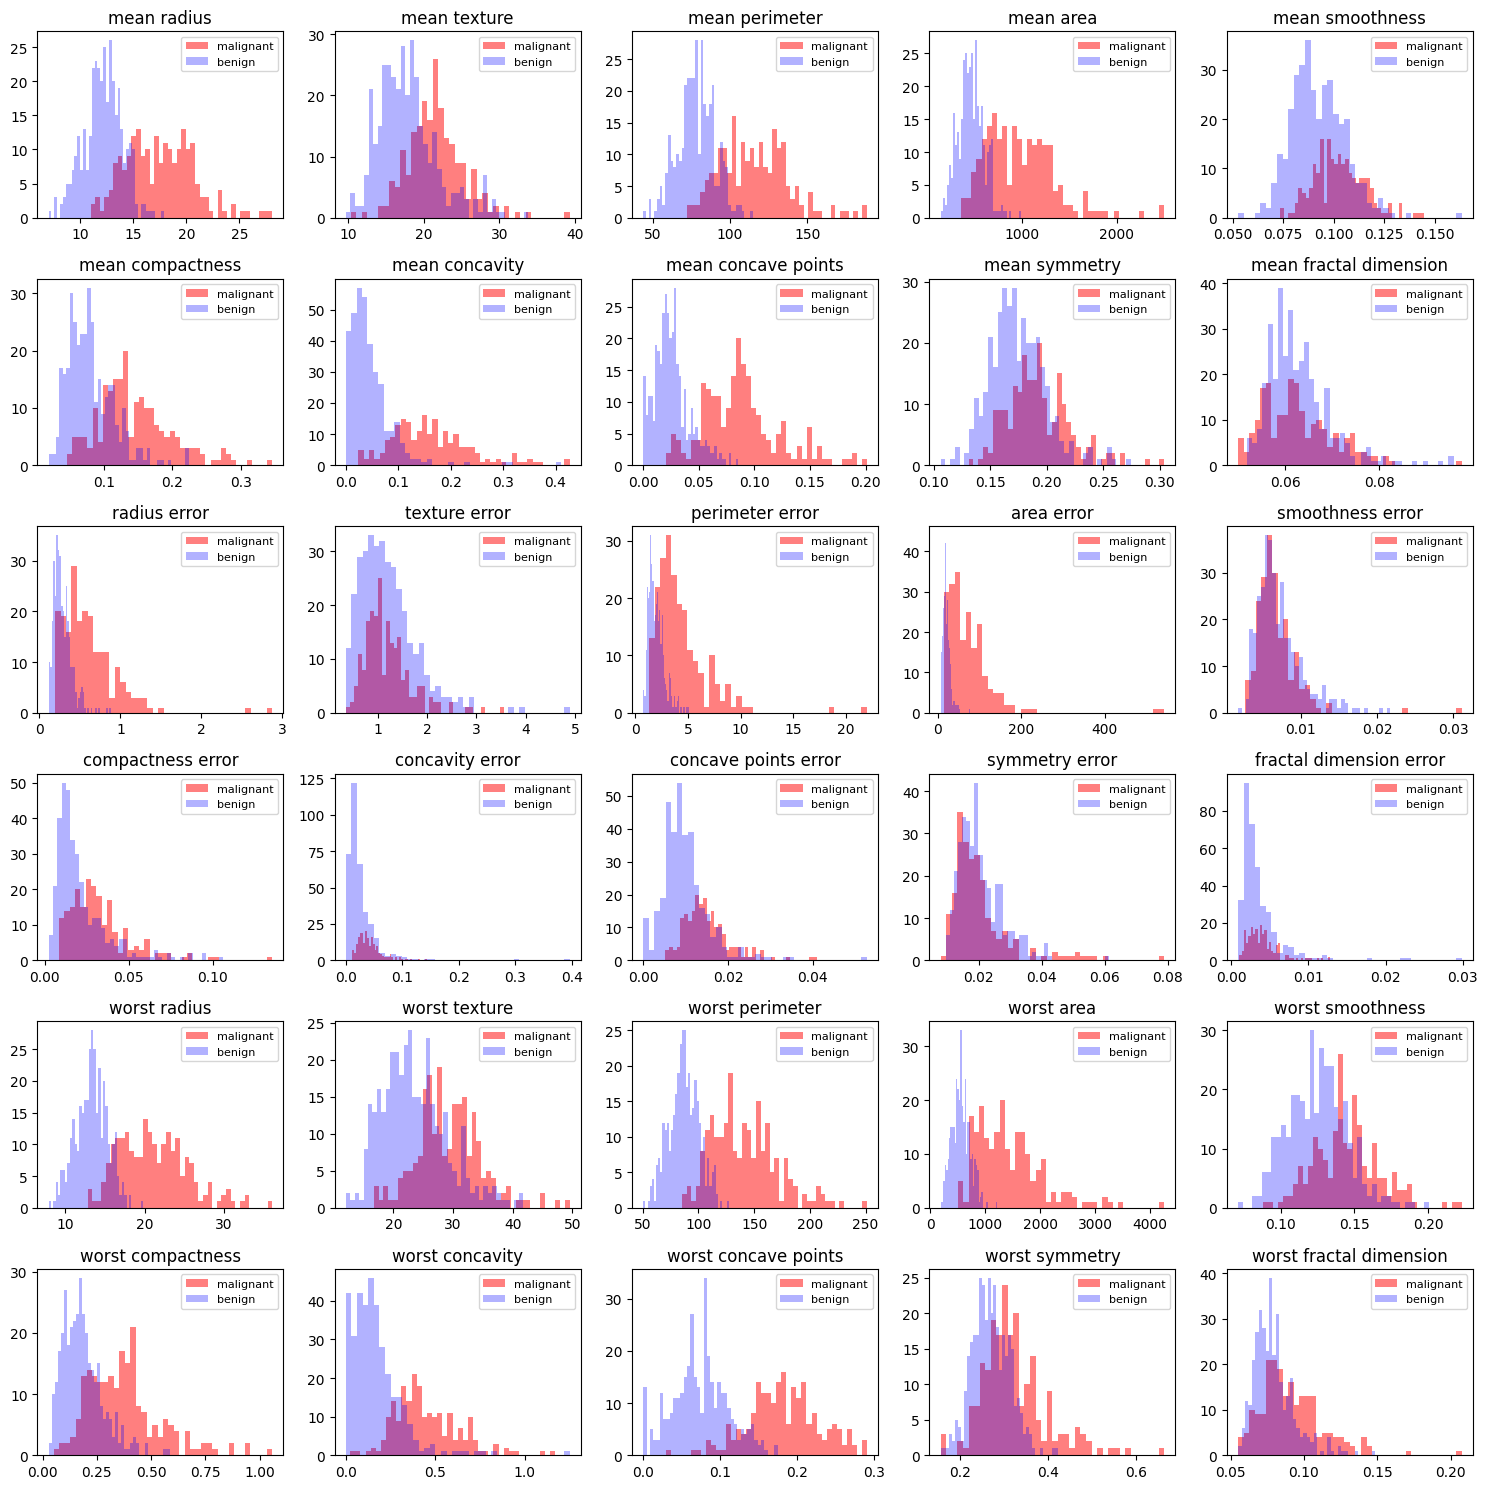

In [13]:
import numpy as np
import matplotlib.pyplot as plt
_, axes = plt.subplots(6,5, figsize=(15, 15))
malignant = breast_cancer.data[breast_cancer.target==0]
benign = breast_cancer.data[breast_cancer.target==1]
ax = axes.ravel()                     # flatten the 2D array
for i in range(30):                   # for each of the 30 features
    bins = 40
    #---plot histogram for each feature---
    ax[i].hist(malignant[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='b', alpha=0.3)
    #---set the title---
    ax[i].set_title(breast_cancer.feature_names[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['malignant','benign'], loc='best', fontsize=8)
    
plt.tight_layout()
plt.show()

For each feature, if two histograms are separate, this means that the feature is important and it directly affects the target (diagnosis). For example, if you look at the histogram for the mean radius feature, you will observe that the larger the tumour, the more likely that the tumor is malignant (red). When they overlap, we can say there is a probability the tumour is malignant or benign. A large difference height indicates high probabability one way or the either. If both are similar in height it is difficult to differentiate.

# Applying machine learning

# Method 1 — Training the Model on original dataset

First, we apply machine learning algorithm directly to the data.

To simplify the process, we convert the data to a datframe.

In [14]:
import pandas as pd
df = pd.DataFrame(breast_cancer.data, 
                  columns = breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Machine learning is done below

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]      
y = df.iloc[:,-1]
#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.9181286549707602

# Method 2 — Training the Model using Reduced Features

In this part, we manually reduce the number of features by choosing the one that look most important.

First, we compute the pairwise correlation with the diagnosis feature. Then we sort in descending order

In [18]:
df_corr = df.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

Get all the features that has at least 0.6 in correlation to the target excluding the diagnosis feature

In [31]:
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

Without further reduction.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features]            # get the reduced features in the 
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.9181286549707602

Taking the top 6

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features[:6]]            # get the reduced features in the 
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.8830409356725146

## Further reducing number of features

VIF is severity of multicollinearity. Multicollinearity is collinearity occurring in more than two explanatory variables (as oppose to response variables which in this case would be the diagnosis). Tolerance is inversely related to the VIF. Tolerenace is a vlue between 0 and 1. A low tolerance (arbitrary) indicates multicollinearity.

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [69]:
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,17.130560,0.058375
worst perimeter,204.329679,0.004894
mean concave points,34.546872,0.028946
worst radius,391.471018,0.002554
mean perimeter,1519.882563,0.000658
worst area,169.931222,0.005885
mean radius,1606.575820,0.000622
mean area,200.004550,0.005000
mean concavity,30.806430,0.032461
worst concavity,14.417687,0.069359


In [72]:
features = calculate_vif(df,features).VIF[calculate_vif(df,features).VIF < 201].index.tolist()
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,16.021738,0.062415
mean concave points,31.758729,0.031487
worst area,14.207946,0.070383
mean area,15.369375,0.065064
mean concavity,25.476393,0.039252
worst concavity,13.801334,0.072457


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features[:6]]            # get the reduced features in the 
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.9064327485380117

As Tolereance is very low for all, it indicates these features are multicollinear

Try to reduce those feature that has high VIF until each feature has VIF less than 5 or tolerance is above 0.2

In [74]:
features = [
    'worst concave points',
    'mean radius',
    'mean concavity',
]
calculate_vif(df,features)

,VIF,Tolerance
worst concave points,4.759243,0.210117
mean radius,2.266584,0.441193
mean concavity,3.917617,0.255257


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.loc[:,features]            # get the reduced features in the 
                                  # dataframe
y = df.loc[:,'diagnosis']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.847953216374269

# Method 3 — Training the Model using Reduced Features (PCA)

In [76]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [77]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [89]:
# print the explained variances
print("Variances:")
print(pca.explained_variance_ratio_)
print()

Variances:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]



The first component alone captures about 44% variability in the data
The second one captures about 19% variability in the data and so on.
The 30 components altogether capture 100% variability in the data.


In [79]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



The first component alone captures about 44% variability in the data
The first two components capture about 63% variability in the data and so on.
The first 8 components together capture about 92.6% variability in the data.


Text(0, 0.5, 'Explained variance (%)')

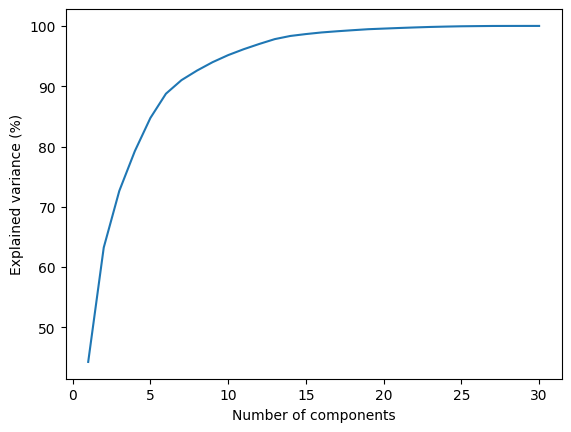

In [80]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Apply PCA 

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components: 6


Text(0, 0.5, 'Explained variance (%)')

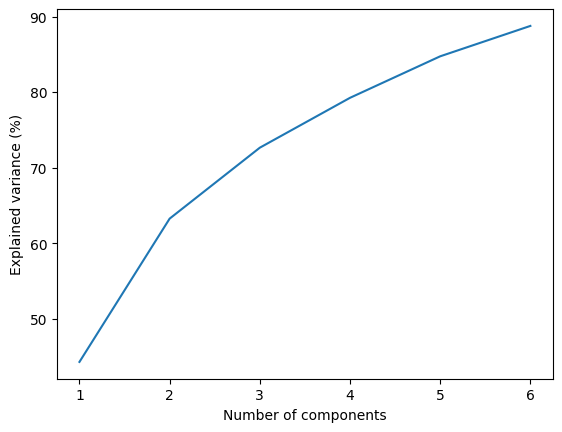

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [82]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

In [83]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness']
Component 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius']
Component 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry']
Component 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness']
Component 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry']
Component 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry']


Transforming all the 30 Columns to the 6 Principal Components

In [84]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


ML

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [116]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LogisticRegression())])

In [121]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [117]:
log_regress_model.score(X_test,y_test)

0.9707602339181286

# Conclusion

PCA performed better than using the whole dataset. PCA with all components performed best but only marginally better than PCA with 6 components.